# Microsoft’s GraphRAG + AutoGen + Ollama + Chainlit = Local & Free Multi-Agent RAG Superbot

1. WSL 환경 설정

- 링크: "Fine-Tuning LLMs Using a Local GPU on Windows", https://robkerr.ai/fine-tuning-llms-using-a-local-gpu-on-windows/

# 1. Window wsl (Linux) 설치 및 설정

- colab으로도 실행은 가능하다, 하단 코드들을 컴퓨터에서 CLI로 직접 실행!
- 앞에 있는 `!` 들을 지워준다

In [ ]:
# 윈도우 파워쉘용 프롬프트
# 얘는 colab 불가

wsl --install -d Ubuntu-24.04

In [ ]:
!sudo apt update
!sudo apt upgrade -y
!sudo apt-get install python3-pip

# 필요한 C/C++ 코드용
!sudo apt-get install -y build-essential gdb

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Ign:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:10 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,167 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Hit:13 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:14 http://archive.ubuntu.com/ubu

In [ ]:
# 컴파일러 설치 여부

!g++ --version

g++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
Copyright (C) 2021 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



# WSL에 Miniconda 설치

In [ ]:
!mkdir -p ~/miniconda3
!wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh -O ~/miniconda3/miniconda.sh
!bash ~/miniconda3/miniconda.sh -b -u -p ~/miniconda3
!rm -rf ~/miniconda3/miniconda.sh
!~/miniconda3/bin/conda init


--2024-08-13 12:47:27--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 146836934 (140M) [application/octet-stream]
Saving to: ‘/root/miniconda3/miniconda.sh’

/root/miniconda3/mi 100%[===================>] 140.03M   239MB/s    in 0.6s    

2024-08-13 12:47:28 (239 MB/s) - ‘/root/miniconda3/miniconda.sh’ saved [146836934/146836934]

PREFIX=/root/miniconda3
Unpacking payload ...

Installing base environment...

Preparing transaction: ...working... done
Executing transaction: ...working... done
installation finished.
    You currently have a PYTHONPATH environment variable set. This may cause
    unexpected behavior when running the Python interpreter in Miniconda3.
    For best results, please verify that your PYTHONPAT

# VS code에 WSL 관련 확장프로그램 설치

- WSL  
- Python extension, using the "Install in WSL:" button that is visible after installing the WSL extension.

이러면 VS code의 "><" 버튼으로 Linux Folder 열람 가능

하지만 해당 링크에서는 WSL CLI를 사용한다

# 추가) WSL에서 Unsloth를 이용해서 LLama3 Fine-Tuning

- Unsloth를 이용해서 LLama3 모델을 Fine-Tuning 하는 것을 보여준다. (github를 찾아가면 Gemma 2 도 가능!!)

- 설정은 상단 링크 참고

- Fine-Tuning 설명 링크: https://github.com/unslothai/unsloth?ref=robkerr.ai 에서 installation instructions 참고

- Train을 위한 notebook 생성: VS code에서 WSL Linux 환경 속 (확장프로그램 요구됨),  상단 Unsloth docs 속의 Notebook으로 train 환경을 테스트할 수 있다.

- 하단은 fine-tuning adapter (llama3 모델에 파라미터를 추가하는데 사용됨)를 저장하는 방법:


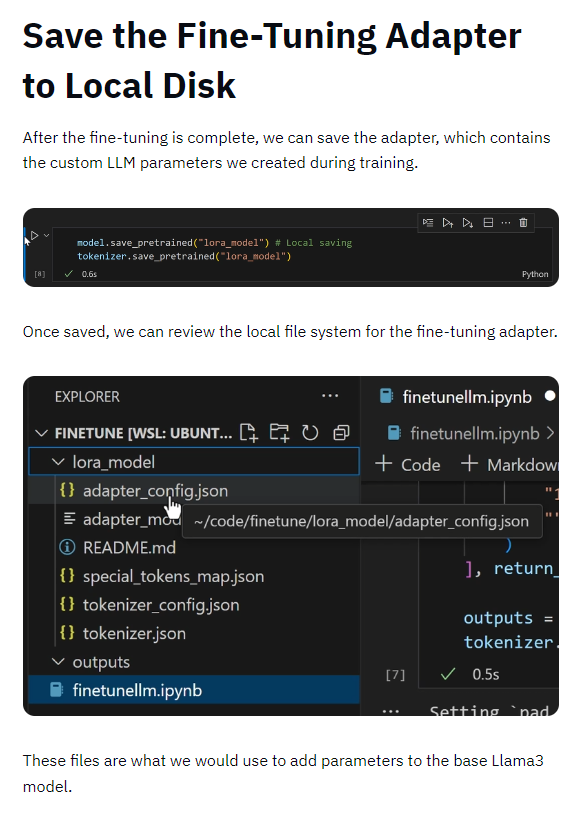




# Unsloth 설치

- WSL CLI로 설치
- conda 환경에 설치
- 아래 코드 실행:

conda install pytorch-cuda=12.1 pytorch cudatoolkit xformers -c pytorch -c nvidia -c xformers

pip install "unsloth[colab-new] @ git+https://github.com/unslothai/unsloth.git"

pip install --no-deps trl peft accelerate bitsandbytes

In [ ]:
# 원본코드

conda install pytorch-cuda=12.1 pytorch cudatoolkit xformers -c pytorch -c nvidia -c xformers

pip install "unsloth[colab-new] @ git+https://github.com/unslothai/unsloth.git"

pip install --no-deps trl peft accelerate bitsandbytes

In [ ]:
# Note, CUDA 11.8 can be used if 12.1 isn't supported on the GPU being used

# colab용 실험 코드
!pip install torch

!pip install "unsloth[colab-new] @ git+https://github.com/unslothai/unsloth.git"

!pip install --no-deps trl peft accelerate bitsandbytes

/bin/bash: line 1: conda: command not found
  Cloning https://github.com/unslothai/unsloth.git to /tmp/pip-install-i1rh8po1/unsloth_cefbf457c07b4021a25926c7dd391c58
  Running command git clone --filter=blob:none --quiet https://github.com/unslothai/unsloth.git /tmp/pip-install-i1rh8po1/unsloth_cefbf457c07b4021a25926c7dd391c58
  Resolved https://github.com/unslothai/unsloth.git to commit 3781a03903c6a24c929737f49a1f73b25a517ac6
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 117.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 107.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Ollama 모델 설치

In [ ]:
# 원본코드

# Mistral for GraphRAG Inference
ollama pull mistral

# Nomic-Embed-Text for GraphRAG Embedding
ollama pull nomic-embed-text

# LLama3 for Autogen Inference
ollama pull llama3

# Host Ollama on a local server: http://localhost:11434
ollama serve

SyntaxError: invalid syntax (<ipython-input-14-68da863b1684>, line 4)

In [ ]:
!pip install colab-xterm #https://pypi.org/project/colab-xterm/
%load_ext colabxterm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.6/115.6 kB 8.7 MB/s eta 0:00:00


In [ ]:
# Mistral for GraphRAG Inference
ollama pull mistral

# Nomic-Embed-Text for GraphRAG Embedding
ollama pull nomic-embed-text

# LLama3 for Autogen Inference
ollama pull llama3

# Host Ollama on a local server: http://localhost:11434
ollama serve

/bin/bash: line 1: ollama: command not found
/bin/bash: line 1: ollama: command not found
/bin/bash: line 1: ollama: command not found
/bin/bash: line 1: ollama: command not found


In [ ]:
!pip install colab-xterm #https://pypi.org/project/colab-xterm/
%load_ext colabxterm

The colabxterm extension is already loaded. To reload it, use:
  %reload_ext colabxterm


In [ ]:
%xterm
# curl -fsSL -v https://ollama.com/install.sh | sh
# 명령어 실행 시 `ollama serve & ` 를 앞에 붙이면 된다!

Launching Xterm...

<IPython.core.display.Javascript object>

# conda 환경 생성

In [ ]:
# 원본 코드

# Create and activate a conda environment
conda create -n RAG_agents python=3.12
conda activate RAG_agents

# Lite-LLM proxy server for Ollama
pip install 'litellm[proxy]'

# Install Ollama
pip install ollama

# Microsoft AutoGen
pip install pyautogen "pyautogen[retrievechat]"

# Microsoft GraphRAG
pip install graphrag

# Text-Token Encoder-Decoder
pip install tiktoken

# Chainlit Python application
pip install chainlit

# Clone my Git-hub repository
git clone https://github.com/karthik-codex/autogen_graphRAG.git

# (BONUS) To Convert PDF files to Markdown for GraphRAG
pip install marker-pdf

# (BONUS) Only if you installed Marker-pdf since it removes GPU CUDA support by default
conda install pytorch torchvision torchaudio pytorch-cuda=12.1 -c pytorch -c nvidia

# GraphRAG db 생성하기

In [ ]:
#make a new folder "input" to place your input files for GraphRAG (.txt or .md)
mkdir -p ./input

# Initialize GraphRAG to create the required files and folders in the root dir
python -m graphrag.index --init  --root .

# Move the settings.yaml file to replace the one created by GraphRAG --init
mv ./utils/settings.yaml ./

- `settings.yaml` 참고하면 어떻게 mistral과 nomic_embed_text를 통해서 index와 embedding을 생성하는지 알 수 있다, API키들은 필요없다:

In [ ]:
encoding_model: cl100k_base
skip_workflows: []
llm:
  api_key: ${GRAPHRAG_API_KEY}
  type: openai_chat # or azure_openai_chat
  model: mistral
  model_supports_json: true
  api_base: http://localhost:11434/v1
.
.
.
embeddings:
  async_mode: threaded # or asyncio
  llm:
    api_key: ${GRAPHRAG_API_KEY}
    type: openai_embedding # or azure_openai_embedding
    model: nomic_embed_text
    api_base: http://localhost:11434/api
.
.
.
input:  #Change input file pattern to.md, or .txt
  type: file # or blob
  file_type: text # or csv
  base_dir: "input"
  file_encoding: utf-8
  file_pattern: ".*\\.md$"

- 사용할 input 파일들은 root 디렉토리의 "input" folder에 넣어놓는다.
- text 혹은 markdown 형태.
- 변환 테스트용으로 `/utils/pdf_to_markdown.py` 사용

## 추가 수정사항)

GraphRAG 관련 코드 실행전에, GraphRAG 패키지 안에 있는 `openai_embeddings_llm.py`와 `embedding.py`를 수정해야한다.

- "nomic-embed-text"를 정당한 embedding 모델로 인식시키기 위해 필요한 과정이다.

- 저자의 파일 위치 참고:   
`/home/karthik/miniconda3/envs/RAG_agents/lib/python3.12/site-packages/graphrag/llm/openai/openai_embeddings_llm.py`  
`/home/karthik/miniconda3/envs/RAG_agents/lib/python3.12/site-packages/graphrag/query/llm/oai/embedding.py`

- 찾는 커맨드: `sudo find / -name openai_embeddings_llm.py`

# Embedding과 Knowledge Graph 생성

- global과 local 서치 메서드로 테스트를 진행한다.
- embedding이 끝나면 output artifacts (.parquet)과 report들(.json .logs) 파일들이 GraphRAG의 working directory (여기서는 root directory)에 있는 "output" 폴더에 생성되어있다.

In [ ]:
# Create knowledge graph - this takes some time
python -m graphrag.index --root .

# Test GraphRAG
python -m graphrag.query --root . --method global "<insert your query>"

# Lite-LLM 서버 생성, 터미널로 app 실행

- app을 실행하기 전에 server를 생성하는 코드이다.
- Lite-LLM 설명 링크: https://microsoft.github.io/autogen-for-net/articles/Function-call-with-ollama-and-litellm.html


In [ ]:
# start server from terminal
litellm --model ollama_chat/llama3

# run app from another terminal
chainlit run appUI.py

# appUI.py

## 해당 파이썬 라이브러리들 불러오기

- chainlit_agents에서 객체를 불러오는 것을 알 수 있다.
- AutoGen agents의 wrapper classes이다
- chainlit이 대화, 종료, 유저 인풋 등을 track할 수 있게 한다
- 설명 링크: https://medium.com/@antoineross/autogen-web-application-using-chainlit-8c5ebf5a4e75

In [ ]:
import autogen
from rich import print
import chainlit as cl
from typing_extensions import Annotated
from chainlit.input_widget import (
   Select, Slider, Switch)
from autogen import AssistantAgent, UserProxyAgent
from utils.chainlit_agents import ChainlitUserProxyAgent, ChainlitAssistantAgent
from graphrag.query.cli import run_global_search, run_local_search

# AutoGen agents 설정하기

- Lite-LLM proxy 서버를 거쳐서 Ollama에서 불러온 모델들을 사용한다
- AutoGen이 non-OpenAI 모델들을 불러오는 것을 지원해주지 않기 때문에 어쩔수 없다.
- proxy 서버를 통해 Ollama 모델들을 calling하고 code를 실행 할 수 있게 된다.

In [ ]:
# LLama3 LLM from Lite-LLM Server for Agents #
llm_config_autogen = {
    "seed": 40,  # change the seed for different trials
    "temperature": 0,
    "config_list": [{"model": "litellm",
                     "base_url": "http://0.0.0.0:4000/",
                     'api_key': 'ollama'},
    ],
    "timeout": 60000,
}

# 대화 시작 시 agents 시작과 user setting

- 3개의 chainlit widget user setting 들: switch, select, slider
- 이를 이용해서 GraphRAG search type, community level, content generation type을 선택할 수 있다.
- switch: ON이 되면 switch 위젯이 GraphRAG local search를 query에 사용한다.
- select: content 생성,  “prioritized list,” “single paragraph,” “multiple paragraphs, “multiple-page report" 가 있다  
- slider: community generation level with options 0, 1, and 2  

community 설명 링크: https://mlnotes.substack.com/p/graphrag-combining-knowledge-graphs


- retriever assistant agent로는 chainlit wrapper class를 사용하지 않았다.
- GraphRAG 함수에서 직접 응답을 받고 서식을 유지할 수 있다.

In [ ]:
@cl.on_chat_start
async def on_chat_start():
  try:
    settings = await cl.ChatSettings(
            [
                Switch(id="Search_type", label="(GraphRAG) Local Search", initial=True),
                Select(
                    id="Gen_type",
                    label="(GraphRAG) Content Type",
                    values=["prioritized list", "single paragraph", "multiple paragraphs", "multiple-page report"],
                    initial_index=1,
                ),
                Slider(
                    id="Community",
                    label="(GraphRAG) Community Level",
                    initial=0,
                    min=0,
                    max=2,
                    step=1,
                ),

            ]
        ).send()

    response_type = settings["Gen_type"]
    community = settings["Community"]
    local_search = settings["Search_type"]

    cl.user_session.set("Gen_type", response_type)
    cl.user_session.set("Community", community)
    cl.user_session.set("Search_type", local_search)

    retriever   = AssistantAgent(
       name="Retriever",
       llm_config=llm_config_autogen,
       system_message="""Only execute the function query_graphRAG to look for context.
                    Output 'TERMINATE' when an answer has been provided.""",
       max_consecutive_auto_reply=1,
       human_input_mode="NEVER",
       description="Retriever Agent"
    )

    user_proxy = ChainlitUserProxyAgent(
        name="User_Proxy",
        human_input_mode="ALWAYS",
        llm_config=llm_config_autogen,
        is_termination_msg=lambda x: x.get("content", "").rstrip().endswith("TERMINATE"),
        code_execution_config=False,
        system_message='''A human admin. Interact with the retriever to provide any context''',
        description="User Proxy Agent"
    )

    print("Set agents.")

    cl.user_session.set("Query Agent", user_proxy)
    cl.user_session.set("Retriever", retriever)

    msg = cl.Message(content=f"""Hello! What task would you like to get done today?
                     """,
                     author="User_Proxy")
    await msg.send()

    print("Message sent.")

  except Exception as e:
    print("Error: ", e)
    pass

# 변경 사항 input settings에 업데이트
- select, switch, slider 위젯에 변경이 생겼다면 그걸 이후 query들에 반영한다

In [ ]:
@cl.on_settings_update
async def setup_agent(settings):
    response_type = settings["Gen_type"]
    community = settings["Community"]
    local_search = settings["Search_type"]
    cl.user_session.set("Gen_type", response_type)
    cl.user_session.set("Community", community)
    cl.user_session.set("Search_type", local_search)
    print("on_settings_update", settings)

# agents와 유저로부터 오는 메세지를 통한 UI 업데이트

- 이 어플의 핵심기능: 2개의 agent들과 채팅을하고, "state_transition" 함수를 정의해서 대화 시퀀스를 관리하고, async RAG query 를 제공한다.

- `LOCAL_SEARCH` bool 파라미터를 통해 `INPUT_DIR` ,`ROOT_DIR`, `RESPONSE_TYPE`, `COMMUNTIY` 파라미터들이 GraphRAG의 local과 global search 쿼리를 통과할지 결정한다.
- GraphRAG 디렉토리 파라미터인 `ROOT_DIR` = '.'로 되어 있으니, 만약 디렉토리를 바꿀것이라면 고려해야한다.
- `query_graphRAG`: global 혹은 local search 쿼리를 부른다.
- 'async def query_graphRAG' 의 `await cl.Message(content=result.response).send()` 가 RAG로부터 직접 output을 retrieve해온다 (서식유지).

- 2개 에이전트만 있으면 되고, `state_transition`을 통해서 대화 속 speaker selection을 더 세밀하게 할 수 있다.

In [ ]:
@cl.on_message
async def run_conversation(message: cl.Message):
    print("Running conversation")
    CONTEXT = message.content

    MAX_ITER = 10
    INPUT_DIR = None
    ROOT_DIR = '.'
    RESPONSE_TYPE = cl.user_session.get("Gen_type")
    COMMUNITY = cl.user_session.get("Community")
    LOCAL_SEARCH = cl.user_session.get("Search_type")

    print("Setting groupchat")

    retriever   = cl.user_session.get("Retriever")
    user_proxy  = cl.user_session.get("Query Agent")

    def state_transition(last_speaker, groupchat):
        messages = groupchat.messages
        if last_speaker is user_proxy:
            return retriever
        if last_speaker is retriever:
            if messages[-1]["content"].lower() not in ['math_expert','physics_expert']:
                return user_proxy
            else:
                if messages[-1]["content"].lower() == 'math_expert':
                    return user_proxy
                else:
                    return user_proxy
        else:
            pass
            return None

    async def query_graphRAG(
          question: Annotated[str, 'Query string containing information that you want from RAG search']
                          ) -> str:
        if LOCAL_SEARCH:
            result = run_local_search(INPUT_DIR, ROOT_DIR, COMMUNITY ,RESPONSE_TYPE, question)
        else:
            result = run_global_search(INPUT_DIR, ROOT_DIR, COMMUNITY ,RESPONSE_TYPE, question)
        await cl.Message(content=result).send()
        return result

    for caller in [retriever]:
        d_retrieve_content = caller.register_for_llm(
            description="retrieve content for code generation and question answering.", api_style="function"
        )(query_graphRAG)

    for agents in [user_proxy, retriever]:
        agents.register_for_execution()(d_retrieve_content)

    groupchat = autogen.GroupChat(
        agents=[user_proxy, retriever],
        messages=[],
        max_round=MAX_ITER,
        speaker_selection_method=state_transition,
        allow_repeat_speaker=True,
    )
    manager = autogen.GroupChatManager(groupchat=groupchat,
                                       llm_config=llm_config_autogen,
                                       is_termination_msg=lambda x: x.get("content", "") and x.get("content", "").rstrip().endswith("TERMINATE"),
                                       code_execution_config=False,
                                       )

# -------------------- Conversation Logic. Edit to change your first message based on the Task you want to get done. ----------------------------- #
    if len(groupchat.messages) == 0:
      await cl.make_async(user_proxy.initiate_chat)( manager, message=CONTEXT, )
    elif len(groupchat.messages) < MAX_ITER:
      await cl.make_async(user_proxy.send)( manager, message=CONTEXT, )
    elif len(groupchat.messages) == MAX_ITER:
      await cl.make_async(user_proxy.send)( manager, message="exit", )